### Check Magnification of Histopathologies from CPTAC_PDA

In [ ]:
from util.data_util import *
import os


dir_path = "../CLAM/CPTAC_PDA"
#wsi = read_wsi("../CLAM/CPTAC_PDA/C3L-00017-22.svs")
for file in os.listdir(dir_path):
    wsi = read_wsi(os.path.join(dir_path,file))
    app_mag = wsi.properties["aperio.AppMag"]
    if app_mag != "20":
        print(app_mag, file)
    

### Check max length of CT preprocessed volumes

In [ ]:
import os
import numpy as np
root_path = "./data/processed_CPTACUCEC_3D_HR_PAD/CT"
subfolders = [f.path for f in os.scandir(root_path) if f.is_dir()] #Get patients folders
empty_count = 0
empty_patients = []
max_length = 0
for subfolder in subfolders:
    patient_id = subfolder.split('/')[-1]
    volumes = [f.path for f in os.scandir(subfolder) ]
    for volume in volumes:
        length = len(np.load(volume))
        if length == 0:
            print(f"!Warning! empty volume! patient_id:{patient_id}")
        #print(f"{patient_id}, volume length: {length}")
        if length != 214:
            print(f"length: {length}\n patient_id:{patient_id}") 
        if  length > max_length:
            max_length = length
print(max_length)


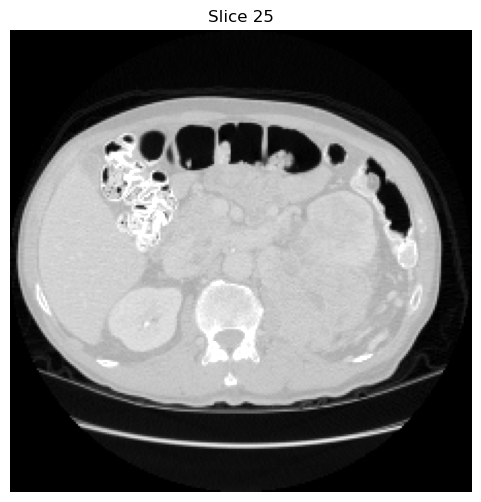

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- load the volume ---
path = "./data/processed/processed_TCGA_KIRC_survival/Rad/TCGA-CJ-5679/1.npy"
vol  = np.load(path)              # shape ≈ (slices, height, width)

# --- pick the slice you want ---
k = 25                            # axial slice index
slice2d = vol[k]                  # same as vol[k, :, :]

# --- (optional) window / normalise ---
vmin, vmax = np.percentile(slice2d, (1, 99))  # robust window
# Or vmin, vmax = slice2d.min(), slice2d.max()

# --- plot ---
plt.figure(figsize=(6, 6))
plt.imshow(slice2d, cmap='gray', vmin=vmin, vmax=vmax)
plt.title(f"Slice {k}")
plt.axis('off')
plt.show()


In [4]:
import os
import numpy as np


max = 0
lengths = []
for dir in os.listdir("./data/processed/processed_TCGA_KIRC_survival/Rad/"):
    for file in os.listdir("./data/processed/processed_TCGA_KIRC_survival/Rad/"+dir):
        l = len(np.load("./data/processed/processed_TCGA_KIRC_survival/Rad/"+dir+"/"+file))
        print(l)
        lengths.append(l)
lengths.sort()
print(lengths)


2
108
131
126
21
179
21
64
55
38
9
136
176
114
31
160
3
47
51
1
44
47
51
44
25
20
25
38
33
46
44
40
40
107
43
43
62
77
23
51
53
29
29
45
47
173
56
56
30
29
1
32
18
18
22
68
106
22
88
162
28
25
32
2
33
58
84
73
29
57
31
18
21
21
186
133
99
153
29
29
89
138
118
170
81
65
25
27
167
167
35
61
93
35
55
54
65
128
115
31
88
31
25
20
81
137
15
90
22
20
20
103
62
55
55
166
156
52
32
30
185
107
2
2
26
48
97
122
4
4
6
47
75
6
35
63
63
39
45
45
17
31
69
96
[1, 1, 2, 2, 2, 2, 3, 4, 4, 6, 6, 9, 15, 17, 18, 18, 18, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 25, 25, 25, 25, 25, 26, 27, 28, 29, 29, 29, 29, 29, 29, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 33, 33, 35, 35, 35, 38, 38, 39, 40, 40, 43, 43, 44, 44, 44, 45, 45, 45, 46, 47, 47, 47, 47, 48, 51, 51, 51, 52, 53, 54, 55, 55, 55, 55, 56, 56, 57, 58, 61, 62, 62, 63, 63, 64, 65, 65, 68, 69, 73, 75, 77, 81, 81, 84, 88, 88, 89, 90, 93, 96, 97, 99, 103, 106, 107, 107, 108, 114, 115, 118, 122, 126, 128, 131, 133, 136, 137, 138, 153, 156, 160, 162, 16